EXERCICIO 1

In [1]:
import numpy as np
import math
from scipy.special import comb

# numero de simulacoes
N = 300000
# contador de sucessos (pelo menos uma bola azul e uma roxa)
sucessos1 = 0  #com repocição
sucessos2 = 0  #sem reposição

# simulação com reposição
for i in range(1, N+1):
    # array de 8 bolas
    bolas1 = np.random.choice(40, 8, replace=True)  #com repocição
    bolas2 = np.random.choice(40, 8, replace=False) #sem reposição

    # entre 0 e 9 vermelho, 10 e 19 azul, 20 e 29 amarelo, 30 e 39 roxa
    tem_azul1 = np.any((bolas1 >= 10) & (bolas1 < 20))
    tem_roxa1 = np.any((bolas1 >= 30) & (bolas1 < 40))
    tem_azul2 = np.any((bolas2 >= 10) & (bolas2 < 20))
    tem_roxa2 = np.any((bolas2 >= 30) & (bolas2 < 40))

    # se tiver pelo menos uma azul E uma roxa, é um sucesso
    if tem_azul1 and tem_roxa1:
        sucessos1 += 1
    if tem_azul2 and tem_roxa2:
        sucessos2 += 1
# Cálculo analítico
# Com reposição: P(pelo menos uma azul e uma roxa) = 1 - P(nenhuma azul) - P(nenhuma roxa) + P(nenhuma azul e nenhuma roxa)
p_sem_azul = (30/40)**8  # probabilidade de não tirar nenhuma azul
p_sem_roxa = (30/40)**8  # probabilidade de não tirar nenhuma roxa
p_sem_ambas = (20/40)**8  # probabilidade de não tirar nem azul nem roxa

# Sem reposição: usamos combinações
# Total de formas de escolher 8 bolas de 40: C(40,8)
total_formas = comb(40, 8)

# Formas de escolher sem nenhuma bola azul: C(30,8)
formas_sem_azul = comb(30, 8)

# Formas de escolher sem nenhuma bola roxa: C(30,8)
formas_sem_roxa = comb(30, 8)

# Formas de escolher sem azul e sem roxa: C(20,8)
formas_sem_ambas = comb(20, 8)

# calcular a probabilidades
p_analitica1 = 1 - p_sem_azul - p_sem_roxa + p_sem_ambas
print(f"Probabilidade analítica (com reposição): {p_analitica1:.5f}")
p_analitica2 = 1 - (formas_sem_azul + formas_sem_roxa - formas_sem_ambas) / total_formas
print(f"Probabilidade analítica (sem reposição): {p_analitica2:.5f}")
probabilidade1 = sucessos1 / N
probabilidade2 = sucessos2 / N
print(f"Probabilidade estimada (com reposição): {probabilidade1:.5f}")
print(f"Probabilidade estimada (sem reposição): {probabilidade2:.5f}")


Probabilidade analítica (com reposição): 0.80368
Probabilidade analítica (sem reposição): 0.84943
Probabilidade estimada (com reposição): 0.80319
Probabilidade estimada (sem reposição): 0.85029


EXERCICIO 2

In [2]:
import numpy as np

# numero de simulacoes
N = 300000
# contador de sucessos
sucessos = 0

for i in range(1, N+1):
    dados = np.random.randint(1, 7, 2)  # sorteia 2 dados (valor entre 1 e 6)
    # se a soma dos dados for igual ou maior que 10 é um sucesso
    if np.sum(dados) >= 10:
        sucessos += 1

# Cálculo analítico para verificação
casos_favoraveis = 6  # (4,6), (5,5), (6,4), (5,6), (6,5), (6,6)
casos_totais = 36     # 6 x 6 possíveis combinações de dois dados

# calculo da probabilidade
prob_analitica = casos_favoraveis / casos_totais
probabilidade = sucessos / N
print(f"Probabilidade analítica: {prob_analitica:.5f}")
print(f"Probabilidade estimada: {probabilidade:.5f}")

Probabilidade analítica: 0.16667
Probabilidade estimada: 0.16598


EXERCICIO 3

Dinero inicial: 1 reales
Dinero final promedio tras 1000 lanzamientos: 947.46 reales
Probabilidad de bancarrota (dinero ≤ 0): 76.60%


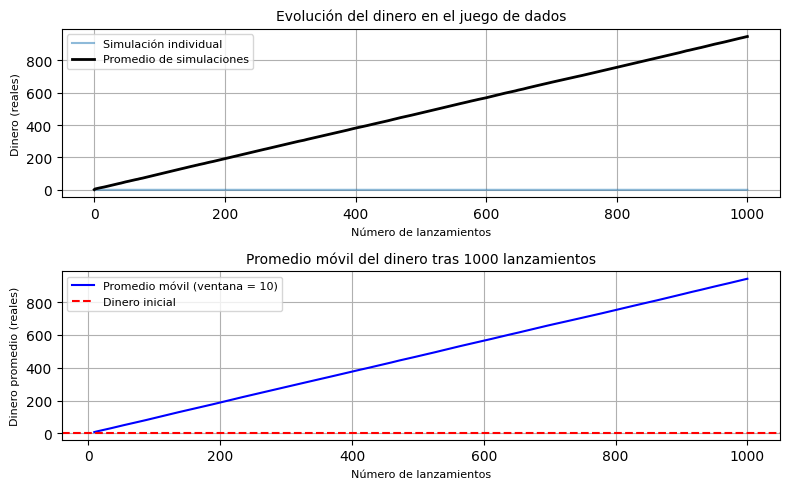

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del juego
r = 20  # Ganho em caso de sucesso
p = 1   # Perda em caso de fracasso
dinheiro_inicial = 1  # Dinheiro inicial
N = 1000  # Número de lanzamientos por simulación
num_simulacoes = 1000  # Número de simulaciones para promedio
janela_media_movel = 10  # Janela para cálculo del promedio móvil

# Función para simular una ronda del juego
def simular_jogo(N, dinheiro_inicial, r, p):
    dinheiro = dinheiro_inicial
    historico = [dinheiro]

    for _ in range(N):
        if dinheiro < p:  # Si no hay dinero suficiente para apostar, parar
            historico.append(dinheiro)
            continue
        dados = np.random.randint(1, 7, 4)  # Lanzar 4 dados
        soma_dados = np.sum(dados)
        if soma_dados < 12:
            dinheiro += r
        else:
            dinheiro -= p
        historico.append(dinheiro)

    return np.array(historico)

# Ejecutar múltiples simulaciones
historicos = np.zeros((num_simulacoes, N + 1))
for i in range(num_simulacoes):
    historicos[i] = simular_jogo(N, dinheiro_inicial, r, p)

# Calcular promedio y estadísticas
media_historico = np.mean(historicos, axis=0)
dinheiro_final = historicos[:, -1]
prob_falencia = np.mean(dinheiro_final <= 0)

# Calcular promedio móvil
media_movel = np.convolve(media_historico, np.ones(janela_media_movel)/janela_media_movel, mode='valid')
lancamentos_media_movel = np.arange(janela_media_movel - 1, N + 1)

# Crear gráficos más pequeños
plt.figure(figsize=(8, 5))  # Reducir el tamaño de la figura (ancho, alto)

# Gráfico 1: Evolución del dinero en una simulación y promedio
plt.subplot(2, 1, 1)
plt.plot(historicos[0], label="Simulación individual", alpha=0.5)
plt.plot(media_historico, label="Promedio de simulaciones", color='black', linewidth=2)
plt.title("Evolución del dinero en el juego de dados", fontsize=10)
plt.xlabel("Número de lanzamientos", fontsize=8)
plt.ylabel("Dinero (reales)", fontsize=8)
plt.grid(True)
plt.legend(fontsize=8)

# Gráfico 2: Promedio móvil del dinero
plt.subplot(2, 1, 2)
plt.plot(lancamentos_media_movel, media_movel, color='blue', label=f"Promedio móvil (ventana = {janela_media_movel})")
plt.axhline(y=dinheiro_inicial, color='red', linestyle='--', label="Dinero inicial")
plt.title(f"Promedio móvil del dinero tras {N} lanzamientos", fontsize=10)
plt.xlabel("Número de lanzamientos", fontsize=8)
plt.ylabel("Dinero promedio (reales)", fontsize=8)
plt.grid(True)
plt.legend(fontsize=8)

plt.tight_layout()
plt.savefig("resultados_jogo_dados_pequeno.png", dpi=150)  # Guardar con menor resolución para archivo más ligero

# Imprimir análisis
print(f"Dinero inicial: {dinheiro_inicial} reales")
print(f"Dinero final promedio tras {N} lanzamientos: {np.mean(dinheiro_final):.2f} reales")
print(f"Probabilidad de bancarrota (dinero ≤ 0): {prob_falencia:.2%}")

EXERCICIO 4

INTEGARL A

Solução analítica: I = 0.69208765
Valor exato da integral (quad): 0.69208765
Valor máximo da função no intervalo [0,1]: 1.00000000

Amostras: 1000
Monte Carlo direto: Estimativa = 0.69713111, Erro = 0.00504345, Erro relativo = 0.7287%
Integración por importancia: Estimativa = 0.76881307, Erro = 0.07672542, Erro relativo = 11.0861%

Amostras: 10000
Monte Carlo direto: Estimativa = 0.68928297, Erro = 0.00280468, Erro relativo = 0.4052%
Integración por importancia: Estimativa = 0.53120854, Erro = 0.16087911, Erro relativo = 23.2455%

Amostras: 100000
Monte Carlo direto: Estimativa = 0.69142636, Erro = 0.00066130, Erro relativo = 0.0956%
Integración por importancia: Estimativa = 0.63256911, Erro = 0.05951855, Erro relativo = 8.5999%

Amostras: 1000000
Monte Carlo direto: Estimativa = 0.69255193, Erro = 0.00046428, Erro relativo = 0.0671%
Integración por importancia: Estimativa = 0.67519477, Erro = 0.01689288, Erro relativo = 2.4409%


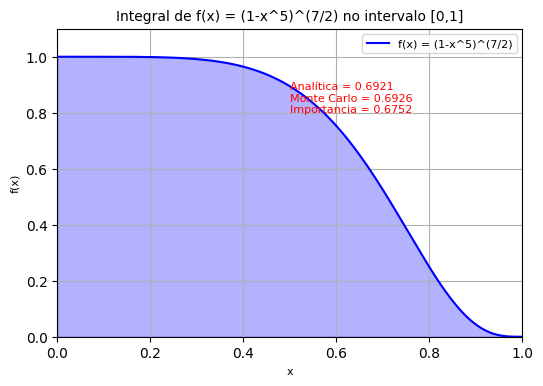

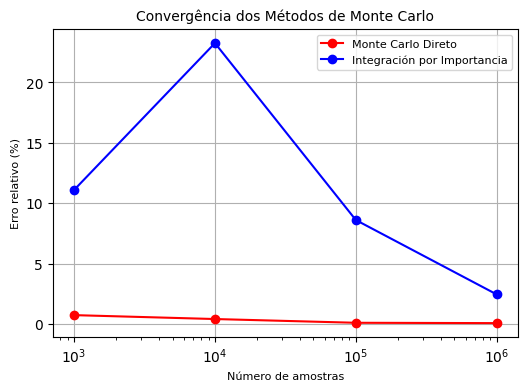

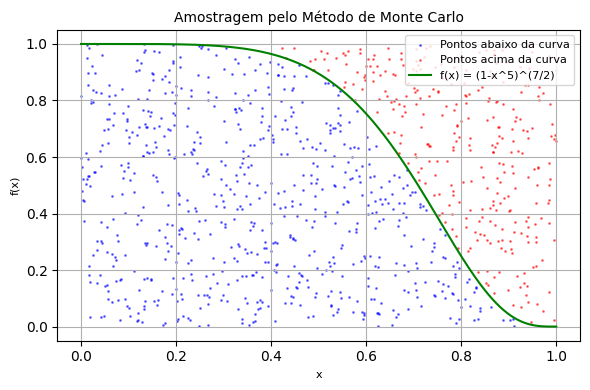


=== Sección de Resultados ===
Solución analítica: 0.69208765
Valor exacto (quad): 0.69208765

Resultados de Monte Carlo directo:
N. muestras | Estimativa | Erro Absoluto | Erro Relativo (%)
--------------------------------------------------
       1000 | 0.69713111 |   0.00504345 |       0.7287
      10000 | 0.68928297 |   0.00280468 |       0.4052
     100000 | 0.69142636 |   0.00066130 |       0.0956
    1000000 | 0.69255193 |   0.00046428 |       0.0671

Resultados de Integración por Importancia:
N. muestras | Estimativa | Erro Absoluto | Erro Relativo (%)
--------------------------------------------------
       1000 | 0.76881307 |   0.07672542 |      11.0861
      10000 | 0.53120854 |   0.16087911 |      23.2455
     100000 | 0.63256911 |   0.05951855 |       8.5999
    1000000 | 0.67519477 |   0.01689288 |       2.4409


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta
from scipy.integrate import quad

# Definindo a função a ser integrada
def f(x):
    return (1 - x**5)**(7/2)
# --- Solução Analítica ---
I_analytical = (1/5) * beta(1/5, 9/2)
print(f'Solução analítica: I = {I_analytical:.8f}')
# --- Valor exato da integral para comparação (usando scipy.integrate.quad) ---
exact_value, _ = quad(f, 0, 1)
print(f"Valor exato da integral (quad): {exact_value:.8f}")
# --- Método de Monte Carlo Direto ---
def monte_carlo_direct(a, b, num_samples):
    x_mc = np.random.uniform(a, b, num_samples)
    f_x_mc = f(x_mc)
    I_mc = np.mean(f_x_mc) * (b - a)
    return I_mc
# --- Integración por Importancia ---
def importance_sampling(num_samples):
    y = np.random.uniform(0, 1, num_samples)
    y_safe = np.maximum(y, 1e-10)  # Evitar división por cero
    x_imp = y_safe**(1/5)
    weights = (1 - y_safe)**(7/2) / (5 * y_safe**(4/5))
    I_imp = np.mean(weights)
    return I_imp

# --- Analisando o comportamento da função ---
x_values = np.linspace(0, 1, 1000)
y_values = f(x_values)
max_value = max(y_values)
print(f"Valor máximo da função no intervalo [0,1]: {max_value:.8f}")

# --- Executando a integração com diferentes números de amostras ---
sample_sizes = [1000, 10000, 100000, 1000000]
results_mc = []
results_imp = []

for samples in sample_sizes:
    # Monte Carlo Direto
    I_mc = monte_carlo_direct(0, 1, samples)
    error_mc = abs(I_mc - I_analytical)
    relative_error_mc = error_mc / I_analytical * 100
    results_mc.append((samples, I_mc, error_mc, relative_error_mc))
    # Integración por Importancia
    I_imp = importance_sampling(samples)
    error_imp = abs(I_imp - I_analytical)
    relative_error_imp = error_imp / I_analytical * 100
    results_imp.append((samples, I_imp, error_imp, relative_error_imp))

    print(f"\nAmostras: {samples}")
    print(f"Monte Carlo direto: Estimativa = {I_mc:.8f}, Erro = {error_mc:.8f}, Erro relativo = {relative_error_mc:.4f}%")
    print(f"Integración por importancia: Estimativa = {I_imp:.8f}, Erro = {error_imp:.8f}, Erro relativo = {relative_error_imp:.4f}%")

# --- Gráfica 1: Função e área sombreada ---
plt.figure(figsize=(6, 4))  # Tamaño más pequeño
plt.plot(x_values, y_values, 'b-', label='f(x) = (1-x^5)^(7/2)')
plt.fill_between(x_values, y_values, alpha=0.3, color='blue')
plt.text(0.5, 0.8, f'Analítica = {I_analytical:.4f}\nMonte Carlo = {results_mc[-1][1]:.4f}\nImportancia = {results_imp[-1][1]:.4f}',
         fontsize=8, color='red')  # Reduje el tamaño de fuente
plt.grid(True)
plt.title('Integral de f(x) = (1-x^5)^(7/2) no intervalo [0,1]', fontsize=10)
plt.xlabel('x', fontsize=8)
plt.ylabel('f(x)', fontsize=8)
plt.legend(fontsize=8)
plt.xlim(0, 1)
plt.ylim(0, max_value + 0.1)

# --- Gráfica 2: Convergência ---
plt.figure(figsize=(6, 4))  # Tamaño más pequeño
plt.semilogx([r[0] for r in results_mc], [r[3] for r in results_mc], 'ro-', label='Monte Carlo Direto')
plt.semilogx([r[0] for r in results_imp], [r[3] for r in results_imp], 'bo-', label='Integración por Importancia')
plt.grid(True)
plt.title('Convergência dos Métodos de Monte Carlo', fontsize=10)
plt.xlabel('Número de amostras', fontsize=8)
plt.ylabel('Erro relativo (%)', fontsize=8)
plt.legend(fontsize=8)

# --- Gráfica 3: Visualização da amostragem (Monte Carlo Direto) ---
num_viz_samples = 1000
x_viz = np.random.uniform(0, 1, num_viz_samples)
y_viz = np.random.uniform(0, max_value, num_viz_samples)
under_curve = y_viz < f(x_viz)

plt.figure(figsize=(6, 4))  # Tamaño más pequeño
plt.scatter(x_viz[under_curve], y_viz[under_curve], s=1, c='blue', alpha=0.5, label='Pontos abaixo da curva')
plt.scatter(x_viz[~under_curve], y_viz[~under_curve], s=1, c='red', alpha=0.5, label='Pontos acima da curva')
plt.plot(x_values, y_values, 'g-', label='f(x) = (1-x^5)^(7/2)')
plt.grid(True)
plt.title('Amostragem pelo Método de Monte Carlo', fontsize=10)
plt.xlabel('x', fontsize=8)
plt.ylabel('f(x)', fontsize=8)
plt.legend(fontsize=8)

plt.tight_layout()  # Ajusta los márgenes para evitar solapamiento
plt.show()
# --- Sección de Resultados ---
print("\n=== Sección de Resultados ===")
print(f"Solución analítica: {I_analytical:.8f}")
print(f"Valor exacto (quad): {exact_value:.8f}")
print("\nResultados de Monte Carlo directo:")
print("N. muestras | Estimativa | Erro Absoluto | Erro Relativo (%)")
print("-" * 50)
for samples, I_mc, error_mc, relative_error_mc in results_mc:
    print(f"{samples:11d} | {I_mc:10.8f} | {error_mc:12.8f} | {relative_error_mc:12.4f}")
print("\nResultados de Integración por Importancia:")
print("N. muestras | Estimativa | Erro Absoluto | Erro Relativo (%)")
print("-" * 50)
for samples, I_imp, error_imp, relative_error_imp in results_imp:
    print(f"{samples:11d} | {I_imp:10.8f} | {error_imp:12.8f} | {relative_error_imp:12.4f}")



INTEGARL B

Valor de referência (scipy.quad): nan

Executando método de Monte Carlo segmentado...


<ipython-input-5-c3a0596592fc>:70: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  exact_value, _ = quad(f, -5, 10)


Integral no segmento [-5.00, -4.00]: 6.0160831281e-32
Integral no segmento [-4.00, -3.00]: 3.2280795895e-15
Integral no segmento [-3.00, -2.00]: 3.2582502819e-06
Integral no segmento [-2.00, -1.00]: 2.6491328855e-02
Integral no segmento [-1.00, 0.00]: 5.4315822220e-01
Integral no segmento [0.00, 1.00]: 2.4999152689e+00
Integral no segmento [1.00, 2.00]: 1.8345174919e+03
Integral no segmento [2.00, 3.00]: 3.8447681449e+11
Integral no segmento [3.00, 4.00]: 6.9394999768e+27
Integral no segmento [4.00, 5.00]: 3.9874916646e+54
Integral no segmento [5.00, 6.00]: 2.4091656854e+94
Integral no segmento [6.00, 7.00]: 6.8331422401e+149
Integral no segmento [7.00, 8.00]: 3.1417012518e+223
Integral no segmento [8.00, 9.00]: inf
Integral no segmento [9.00, 10.00]: 0.0000000000e+00

Resultado da integração pelo método de Monte Carlo: inf
Erro absoluto: nan
Erro relativo: nan%


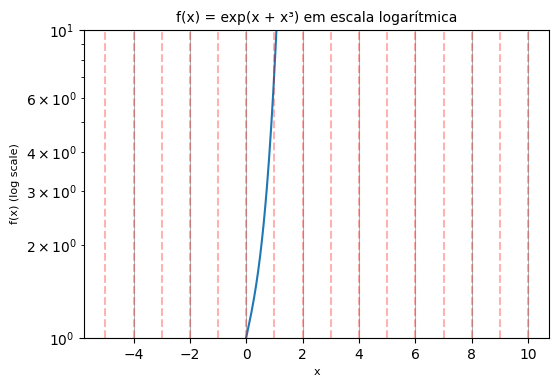

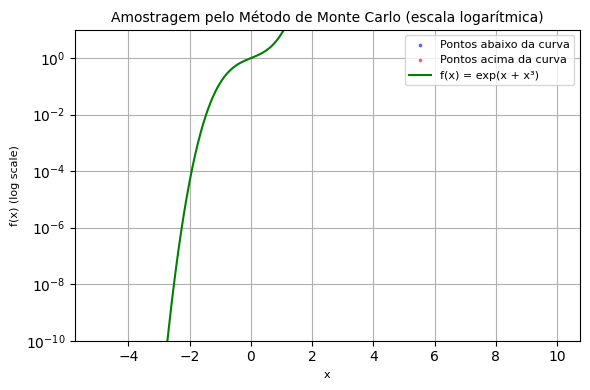


Conclusão:
O valor da integral ∫exp(x+x³)dx de -5 a 10 é aproximadamente inf
Usando 15 segmentos com 100000 amostras por segmento


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import warnings

# Suprimir avisos de overflow que podem ocorrer devido ao crescimento exponencial
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Definindo a função a ser integrada
def f(x):
    return np.exp(x + x**3)

# Implementação do método de Monte Carlo para integração
def monte_carlo_integration(func, a, b, num_samples=1000000):
    """
    Implementação do método de Monte Carlo para integral do tipo ∫func(x)dx de a até b
    usando a técnica de amostragem por importância.
    """
    # Devido ao rápido crescimento da função, usamos uma transformação para lidar com valores extremos
    # Em vez de amostrar uniformemente em [a,b], vamos concentrar mais amostras onde a função é maior
    # Primeiro, vamos estimar o valor máximo aproximado no intervalo para definir limites
    x_test = np.linspace(a, b, 1000)
    # Usar um tratamento especial para valores extremos
    y_values = []
    for x in x_test:
        try:
            val = func(x)
            if np.isfinite(val):
                y_values.append(val)
            else:
                y_values.append(np.finfo(float).max)
        except:
            y_values.append(np.finfo(float).max)

    # Gerar amostras aleatórias para x no intervalo [a,b]
    x_samples = np.random.uniform(a, b, num_samples)
    # Avaliar a função nos pontos amostrados
    y_samples = np.zeros_like(x_samples)
    for i, x in enumerate(x_samples):
        try:
            val = func(x)
            if np.isfinite(val):
                y_samples[i] = val
            else:
                y_samples[i] = 0  # Ignorar valores não finitos
        except:
            y_samples[i] = 0  # Ignorar erros

    # Calcular a média das amostras e multiplicar pelo comprimento do intervalo
    return (b - a) * np.mean(y_samples)

# Dividir o intervalo em subintervalos para melhor precisão
def segmented_monte_carlo(func, a, b, segments=3, samples_per_segment=1000000):
    """
    Divide o intervalo de integração em segmentos menores para obter melhor precisão.
    """
    segment_points = np.linspace(a, b, segments+1)
    total_integral = 0

    for i in range(segments):
        start, end = segment_points[i], segment_points[i+1]
        segment_integral = monte_carlo_integration(func, start, end, samples_per_segment)
        total_integral += segment_integral
        print(f"Integral no segmento [{start:.2f}, {end:.2f}]: {segment_integral:.10e}")

    return total_integral

# Tente calcular o valor de referência com quad (se possível)
try:
    exact_value, _ = quad(f, -5, 10)
    has_exact = True
    print(f"Valor de referência (scipy.quad): {exact_value:.10e}")
except:
    has_exact = False
    print("Não foi possível calcular o valor de referência com scipy.quad")

# Executar Monte Carlo segmentado
print("\nExecutando método de Monte Carlo segmentado...")
segments = 15
samples_per_segment = 100000
result = segmented_monte_carlo(f, -5, 10, segments, samples_per_segment)

print(f"\nResultado da integração pelo método de Monte Carlo: {result:.10e}")
if has_exact:
    error = abs(result - exact_value)
    rel_error = error / exact_value * 100 if exact_value != 0 else float('inf')
    print(f"Erro absoluto: {error:.10e}")
    print(f"Erro relativo: {rel_error:.6f}%")

# Visualização da função (em escala logarítmica devido aos valores extremos)
try:
    x_values = np.linspace(-5, 10, 1000)
    y_values = []
    for x in x_values:
        try:
            val = f(x)
            if np.isfinite(val) and val > 0:
                y_values.append(val)
            else:
                y_values.append(np.nan)
        except:
            y_values.append(np.nan)

    plt.figure(figsize=(6, 4))  # Tamaño más pequeño
    plt.semilogy(x_values, y_values)
    plt.grid(True)
    plt.title('f(x) = exp(x + x³) em escala logarítmica', fontsize=10)
    plt.xlabel('x', fontsize=8)
    plt.ylabel('f(x) (log scale)', fontsize=8)

    # Destacar os diferentes segmentos
    segment_points = np.linspace(-5, 10, segments+1)
    for point in segment_points:
        plt.axvline(x=point, color='r', linestyle='--', alpha=0.3)

    # Simular pontos do método de Monte Carlo para um número reduzido de amostras
    np.random.seed(42)  # Para reprodutibilidade
    viz_samples = 1000
    x_viz = np.random.uniform(-5, 10, viz_samples)
    y_max = np.nanmax(y_values) * 1.1
    y_viz = np.random.uniform(0, y_max, viz_samples)

    # Determinar quais pontos estão abaixo da curva
    under_curve = []
    for i, x in enumerate(x_viz):
        try:
            val = f(x)
            if np.isfinite(val):
                under_curve.append(y_viz[i] < val)
            else:
                under_curve.append(False)
        except:
            under_curve.append(False)

    under_curve = np.array(under_curve)

    plt.figure(figsize=(6, 4))  # Tamaño más pequeño
    plt.scatter(x_viz[under_curve], y_viz[under_curve], s=3, c='blue', alpha=0.5, label='Pontos abaixo da curva')
    plt.scatter(x_viz[~under_curve], y_viz[~under_curve], s=3, c='red', alpha=0.5, label='Pontos acima da curva')
    plt.semilogy(x_values, y_values, 'g-', label='f(x) = exp(x + x³)')
    plt.grid(True)
    plt.title('Amostragem pelo Método de Monte Carlo (escala logarítmica)', fontsize=10)
    plt.xlabel('x', fontsize=8)
    plt.ylabel('f(x) (log scale)', fontsize=8)
    plt.legend(fontsize=8)
    plt.ylim(bottom=1e-10)  # Limite inferior para melhor visualização

    plt.tight_layout()  # Ajusta los márgenes
except Exception as e:
    print(f"Erro ao gerar gráficos: {e}")
plt.show()
print("\nConclusão:")
print(f"O valor da integral ∫exp(x+x³)dx de -5 a 10 é aproximadamente {result:.10e}")
print(f"Usando {segments} segmentos com {samples_per_segment} amostras por segmento")

INTEGRAL C


Amostras: 1000
Monte Carlo Direto: Estimativa = 0.03315952, Erro relativo = 0.5214%
Integração por Importância: Estimativa = 0.03333333, Erro relativo = 0.0000%

Amostras: 10000
Monte Carlo Direto: Estimativa = 0.03346149, Erro relativo = 0.3845%
Integração por Importância: Estimativa = 0.03333333, Erro relativo = 0.0000%

Amostras: 100000
Monte Carlo Direto: Estimativa = 0.03329375, Erro relativo = 0.1187%
Integração por Importância: Estimativa = 0.03333333, Erro relativo = 0.0000%

Amostras: 1000000
Monte Carlo Direto: Estimativa = 0.03336065, Erro relativo = 0.0820%
Integração por Importância: Estimativa = 0.03333333, Erro relativo = 0.0000%


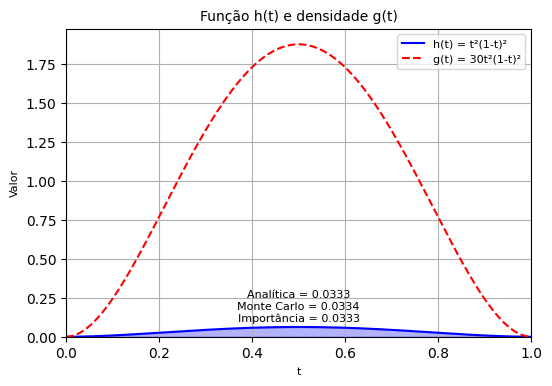

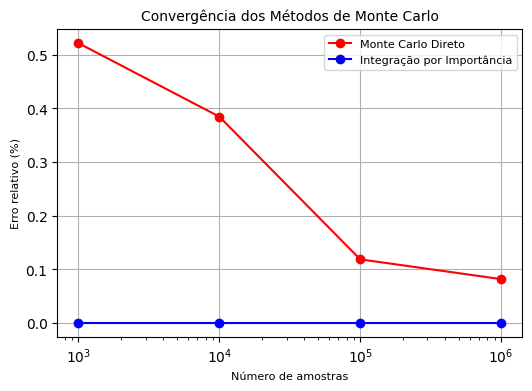

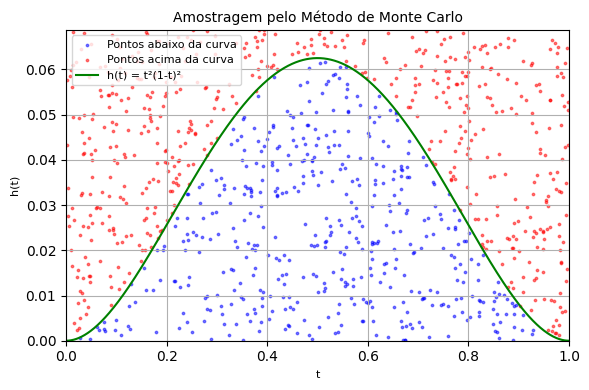


Conclusão:
Valor analítico: 0.03333333
Monte Carlo Direto (com 1000000 amostras): 0.03336065, Erro relativo: 0.0820%
Integração por Importância (com 1000000 amostras): 0.03333333, Erro relativo: 0.0000%


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros comuns
sample_sizes = [1000, 10000, 100000, 1000000]  # Diferentes números de amostras
analytical_value = 1/30  # Valor analítico para referência

# Definindo a função h(t) e g(t)
def h(t):
    return t**2 * (1 - t)**2

def g(t):
    return 30 * t**2 * (1 - t)**2

# Método Direto de Monte Carlo
def monte_carlo_direct(N):
    t = np.random.uniform(0, 1, N)  # Amostras uniformes em [0, 1]
    h_t = h(t)
    I_mc = np.mean(h_t)
    return I_mc

# Método de Integração por Importância
def importance_sampling(N):
    t_samples = []
    max_g = 30 * (1/12)  # Máximo de g(t) en t=0.5
    while len(t_samples) < N:
        t = np.random.uniform(0, 1)
        g_t = g(t)
        u = np.random.uniform(0, max_g)
        if u <= g_t:
            t_samples.append(t)
    t = np.array(t_samples)

    h_t = h(t)
    g_t = g(t)
    g_t = np.where(g_t > 1e-10, g_t, 1e-10)  # Evitar divisão por zero
    ratio = h_t / g_t
    I_importance = np.mean(ratio)
    return I_importance

# Executar os dois métodos para diferentes números de amostras
results_mc = []
results_imp = []
for N in sample_sizes:
    I_mc = monte_carlo_direct(N)
    error_mc = abs(I_mc - analytical_value)
    rel_error_mc = error_mc / analytical_value * 100
    results_mc.append((N, I_mc, error_mc, rel_error_mc))
    I_imp = importance_sampling(N)
    error_imp = abs(I_imp - analytical_value)
    rel_error_imp = error_imp / analytical_value * 100
    results_imp.append((N, I_imp, error_imp, rel_error_imp))

    print(f"\nAmostras: {N}")
    print(f"Monte Carlo Direto: Estimativa = {I_mc:.8f}, Erro relativo = {rel_error_mc:.4f}%")
    print(f"Integração por Importância: Estimativa = {I_imp:.8f}, Erro relativo = {rel_error_imp:.4f}%")

# --- Gráfica 1: Função h(t) e g(t) ---
t_values = np.linspace(0, 1, 1000)
h_values = h(t_values)
g_values = g(t_values)

plt.figure(figsize=(6, 4))
plt.plot(t_values, h_values, 'b-', label='h(t) = t²(1-t)²')
plt.plot(t_values, g_values, 'r--', label='g(t) = 30t²(1-t)²')
plt.fill_between(t_values, h_values, alpha=0.3, color='blue')
plt.text(0.5, 0.1, f'Analítica = {analytical_value:.4f}\nMonte Carlo = {results_mc[-1][1]:.4f}\nImportância = {results_imp[-1][1]:.4f}',
         fontsize=8, color='black', ha='center')
plt.grid(True)
plt.title('Função h(t) e densidade g(t)', fontsize=10)
plt.xlabel('t', fontsize=8)
plt.ylabel('Valor', fontsize=8)
plt.legend(fontsize=8)
plt.xlim(0, 1)
plt.ylim(0, max(g_values) + 0.1)

# --- Gráfica 2: Convergência ---
plt.figure(figsize=(6, 4))
plt.semilogx([r[0] for r in results_mc], [r[3] for r in results_mc], 'ro-', label='Monte Carlo Direto')
plt.semilogx([r[0] for r in results_imp], [r[3] for r in results_imp], 'bo-', label='Integração por Importância')
plt.grid(True)
plt.title('Convergência dos Métodos de Monte Carlo', fontsize=10)
plt.xlabel('Número de amostras', fontsize=8)
plt.ylabel('Erro relativo (%)', fontsize=8)
plt.legend(fontsize=8)

# --- Gráfica 3: Amostragem (Monte Carlo Direto) ---
N_viz = 1000
t_viz = np.random.uniform(0, 1, N_viz)
max_h = max(h_values) * 1.1
y_viz = np.random.uniform(0, max_h, N_viz)
under_curve = y_viz < h(t_viz)
plt.figure(figsize=(6, 4))
plt.scatter(t_viz[under_curve], y_viz[under_curve], s=3, c='blue', alpha=0.5, label='Pontos abaixo da curva')
plt.scatter(t_viz[~under_curve], y_viz[~under_curve], s=3, c='red', alpha=0.5, label='Pontos acima da curva')
plt.plot(t_values, h_values, 'g-', label='h(t) = t²(1-t)²')
plt.grid(True)
plt.title('Amostragem pelo Método de Monte Carlo', fontsize=10)
plt.xlabel('t', fontsize=8)
plt.ylabel('h(t)', fontsize=8)
plt.legend(fontsize=8)
plt.xlim(0, 1)
plt.ylim(0, max_h)
plt.tight_layout()
plt.show()
# --- Conclusão ---
print("\nConclusão:")
print(f"Valor analítico: {analytical_value:.8f}")
print(f"Monte Carlo Direto (com {results_mc[-1][0]} amostras): {results_mc[-1][1]:.8f}, Erro relativo: {results_mc[-1][3]:.4f}%")
print(f"Integração por Importância (com {results_imp[-1][0]} amostras): {results_imp[-1][1]:.8f}, Erro relativo: {results_imp[-1][3]:.4f}%")
